In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score

# Data Exploration

In [4]:
df_train = pd.read_csv('Datasets/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test = pd.read_csv('Datasets/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [7]:
print('Shape of df_train: {}'.format(df_train.shape))
print('Shape of df_test:  {}'.format(df_test.shape))
print('Shape of df:       {}'.format(df.shape))

Shape of df_train: (891, 12)
Shape of df_test:  (418, 11)
Shape of df:       (1309, 12)


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
def missing(data):
    missing_values = pd.DataFrame(columns = ['Column', 'Count of missing values', 'Percent of missing values (%)'])
    for col in data.columns:
        missing_values.loc[len(missing_values.index)] = [col, data[col].isna().sum(), round(data[col].isna().sum()/len(data)*100, 2)]
    return missing_values

In [11]:
missing(df_train)

,Column,Count of missing values,Percent of missing values (%)
0,PassengerId,0,0.00
1,Survived,0,0.00
2,Pclass,0,0.00
3,Name,0,0.00
4,Sex,0,0.00
5,Age,177,19.87
6,SibSp,0,0.00
7,Parch,0,0.00
8,Ticket,0,0.00
9,Fare,0,0.00


In [12]:
missing(df_test)

,Column,Count of missing values,Percent of missing values (%)
0,PassengerId,0,0.00
1,Pclass,0,0.00
2,Name,0,0.00
3,Sex,0,0.00
4,Age,86,20.57
5,SibSp,0,0.00
6,Parch,0,0.00
7,Ticket,0,0.00
8,Fare,1,0.24
9,Cabin,327,78.23


Missing values occur in columns of Age, Cabin, Fare, and Embarked. Although Cabin likely affect the survival probability, over 70% of Cabin columns for both train and test data are null, so we will drop these columns later. Meanwhile, we will replace missing values in Age, Embarked, and Fare columns with appropriate methods.

In [13]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Summary (for train data):
<li>Each column includes different values.
<li>There are high probabilities of outliers for Age, SibSp, Parch, and Fare.
<li>About 65% of passengers are male.
<li>Most passengers belonged Pclass 3, traveled alone (not go with their families), and embarked at port S.

In [15]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
df_test.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


Test data has similar pattern as train data.

In [17]:
# Check to see if there are duplicated rows
sum(df_train.duplicated())

0

# Data Visualization

### Correlation between columns

<Axes: >

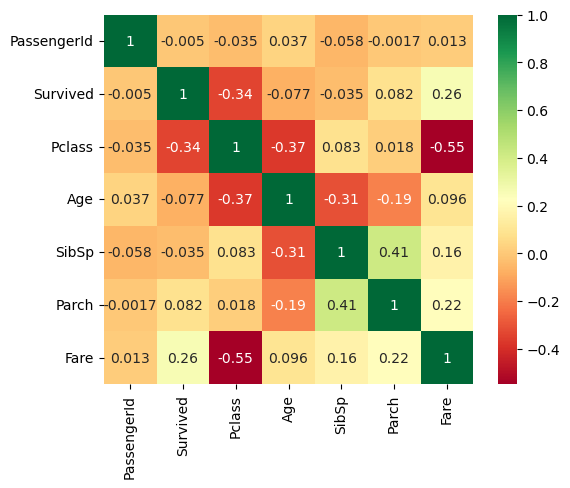

In [18]:
sns.heatmap(df_train.select_dtypes(include=np.number).corr(), annot=True, square=True, cmap='RdYlGn')

Summary:
<li>There are fairly strong correlation between Pclass and Fare, and Survived. The lower value the Pclass has, the higher the fare, and the higher the survival rate.
<li>The older people tended to purchase upper Pclass (ex. Pclass 1) and did not accompany with their siblings or spouses.
<li>SibSp and Parch are correlated with each other. A passenger who went with parents were more likely to be with their siblings and spouses.

### Age

[Text(0.5, 1.0, 'Age Distribution'), Text(0, 0.5, 'Count of Passengers')]

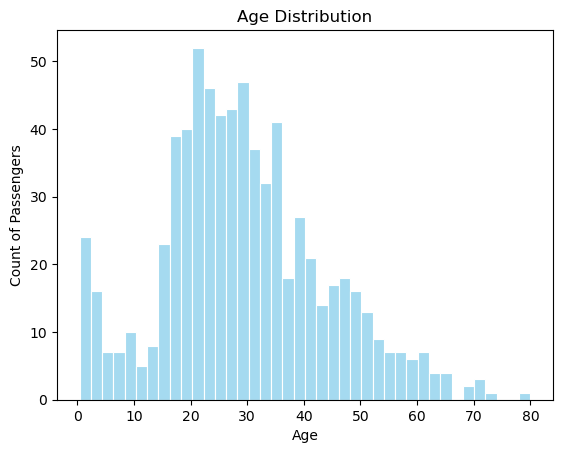

In [19]:
sns.histplot(x='Age', data=df_train, bins=40, color='skyblue', edgecolor='white').set(title='Age Distribution', ylabel='Count of Passengers')

Based on the American Medical Associations and the histogram above, Age divided into: [0, 1), [1, 12), [12, 17), [17, 35), [35, 50), [50, 65), [65, inf).

In [20]:
# Classify Age groups
ranges = [0, 1, 12, 17, 35, 50, 65, np.inf]
group_names = ['[0, 1)', '[1, 12)', '[12, 17)', '[17, 35)', '[35, 50)', '[50, 65)', '[65, inf)']
df['AgeGroup'] = pd.cut(df.Age, bins=ranges, labels=group_names)

In [21]:
df_train = df.iloc[:891,:]

[Text(0.5, 1.0, 'Survival Count by Age Group'),
 Text(0, 0.5, 'Count of Passengers')]

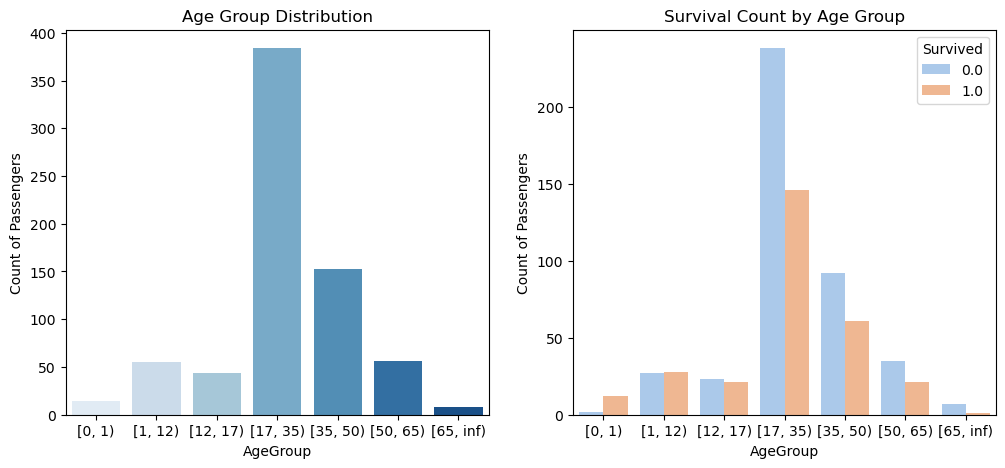

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x='AgeGroup', data=df_train, palette='Blues', ax=axes[0]).set(title='Age Group Distribution', ylabel='Count of Passengers')
sns.countplot(x='AgeGroup', hue='Survived', data=df_train, palette='pastel', ax=axes[1]).set(title='Survival Count by Age Group', ylabel='Count of Passengers')

Most passengers are young and middle-aged adults with the survival probability of approximately 60%. Children are prioritized in rescuing, especially infants.

### Sex

[Text(0.5, 1.0, 'Survival Count by Sex'), Text(0, 0.5, 'Count of Passengers')]

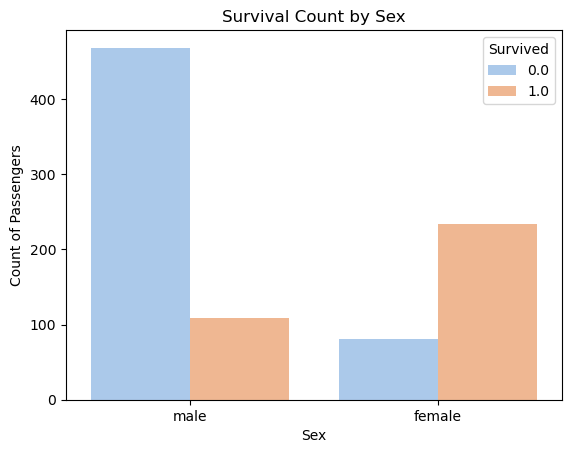

In [23]:
sns.countplot(x='Sex', hue='Survived', data=df_train, palette='pastel').set(title='Survival Count by Sex', ylabel='Count of Passengers')

Female were prioritized in rescuing, compared to male.

### Pclass

[Text(0.5, 1.0, 'Survival Count by Pclass'),
 Text(0, 0.5, 'Count of Passengers')]

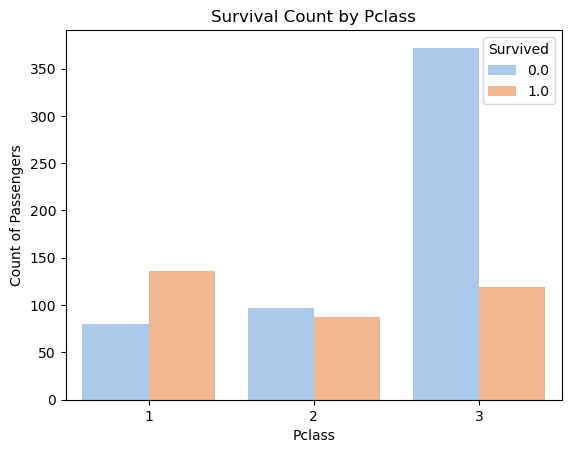

In [24]:
sns.countplot(x='Pclass', hue='Survived', data=df_train, palette='pastel').set(title='Survival Count by Pclass', ylabel='Count of Passengers')

Socioeconomic status clearly affected priority in rescuing in case of disaster. Survial ratio is highest for Pclass 1, followed by Pclass 2, and lowest for Pclass 3.

### SibSp & Parch

[Text(0.5, 1.0, 'Parch Distribution'), Text(0, 0.5, 'Count of Passengers')]

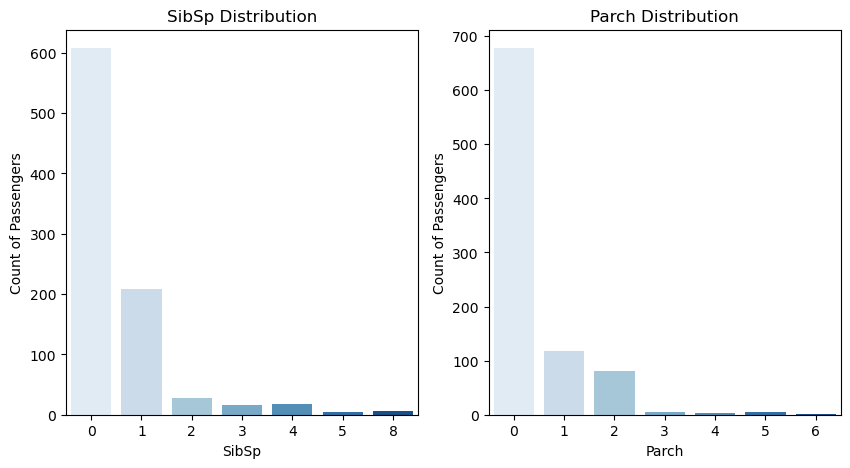

In [25]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x='SibSp', data=df_train, palette='Blues', ax=axes[0]).set(title='SibSp Distribution', ylabel='Count of Passengers')
sns.countplot(x='Parch', data=df_train, palette='Blues', ax=axes[1]).set(title='Parch Distribution', ylabel='Count of Passengers')

Passengers tended not to go with their families. Going in a big family is rare.

Text(0.5, 1.0, 'Survival Count by Parch')

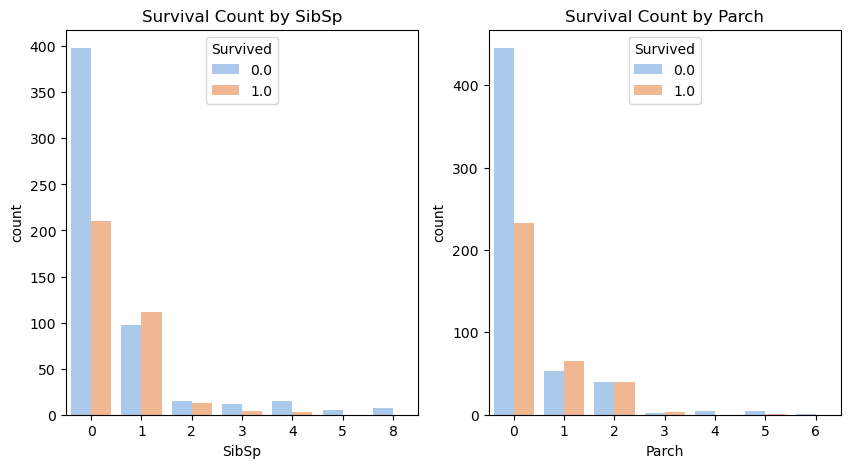

In [26]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x='SibSp', hue='Survived', data=df_train, palette='pastel', ax=axes[0]).set_title('Survival Count by SibSp')
sns.countplot(x='Parch', hue='Survived', data=df_train, palette='pastel', ax=axes[1]).set_title('Survival Count by Parch')

Passengers who have a couple of companies has the higher ratio of survival of approximately 50%.

### Fare

[Text(0.5, 1.0, 'Fare Distribution')]

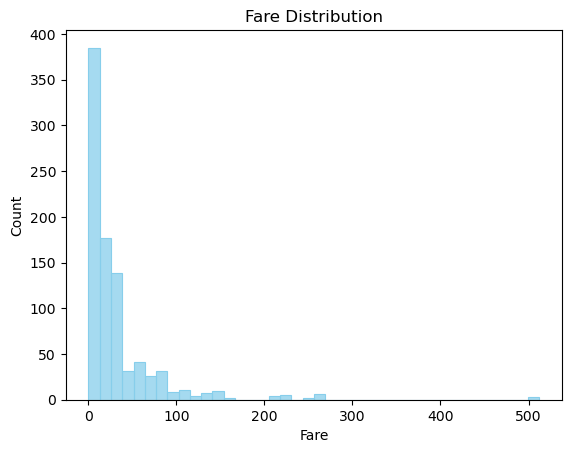

In [29]:
sns.histplot(x='Fare', data=df_train, color='skyblue', edgecolor='skyblue', bins=40).set(title='Fare Distribution')

Fare ranges a lot, even over 500, but mostly is under 30.

In [30]:
# Investigate the fare of over 500
df_train[df_train.Fare > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,"[17, 35)"
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,"[35, 50)"
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,"[17, 35)"


The extremely high fare corresponded to 3 passengers in the age of 30 with the high socioeconomic status (Pclass 1). All survived after the disaster.

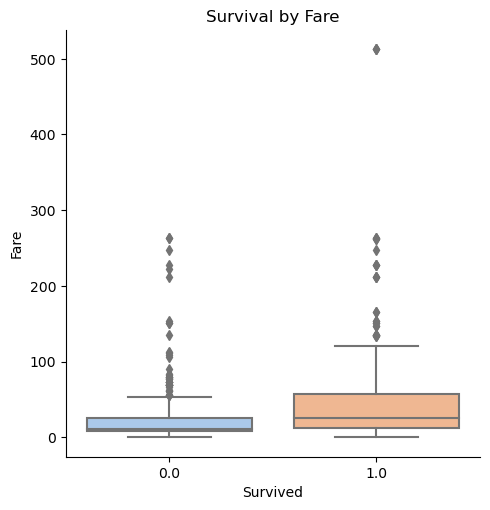

In [31]:
sns.catplot(y='Fare', x='Survived', data=df_train, kind='box', palette='pastel').set(title='Survival by Fare')

It appears that the high fare was an indicator for the higher survival probability. All passengers who paid fare of over 500 survived.

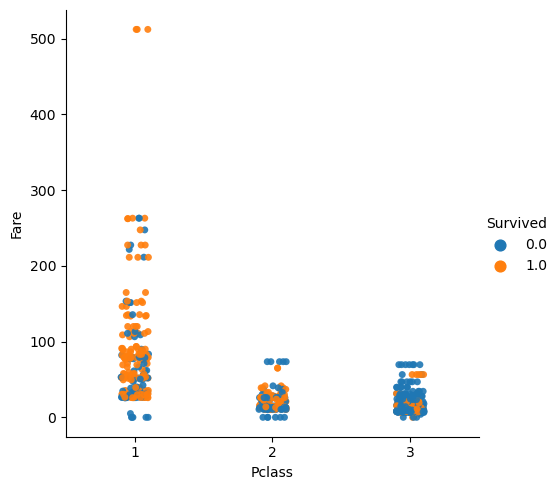

In [32]:
sns.catplot(data=df_train, x='Pclass', y='Fare', hue='Survived', kind='strip', alpha=.9)

The difference in Pclass demonstrated via fare. While fare corresponding to Pclass 2 and 3 always below 100, fare for Pclass 1 ranges a lot.

### Embarked

[Text(0.5, 1.0, 'Survival Count by Embarked'),
 Text(0, 0.5, 'Count of Passengers')]

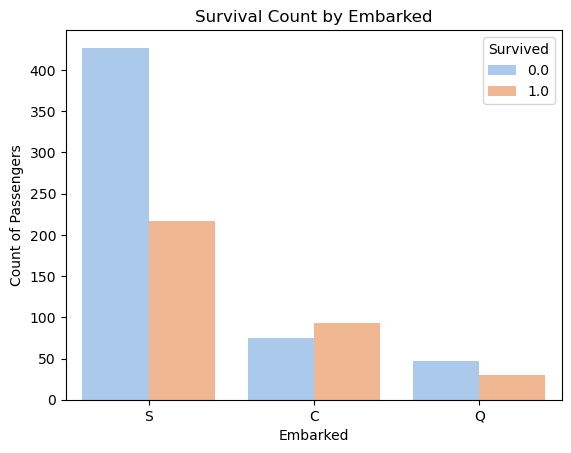

In [33]:
sns.countplot(x='Embarked', hue='Survived', data=df_train, palette='pastel').set(title='Survival Count by Embarked', ylabel='Count of Passengers')

Passengers whose embarked is C are most likely to survive.

### Cabin

In [34]:
df['CabinGroup'] = df.Cabin.str[:1]

In [35]:
df_train = df.iloc[:891,:].copy()

In [36]:
df_train.CabinGroup.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CabinGroup, dtype: int64

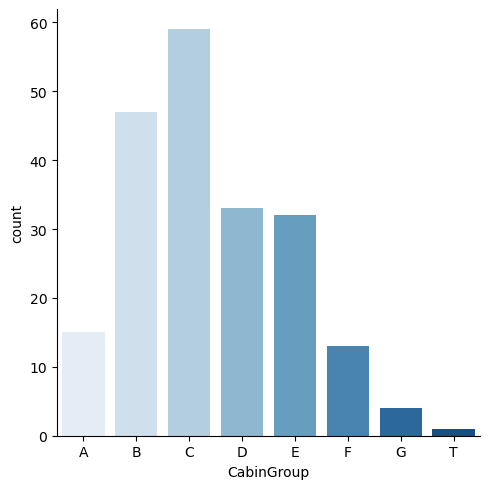

In [37]:
sns.catplot(x='CabinGroup', data=df_train, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], palette='Blues', kind='count')

The majority of passengers stayed in Cabin B and C.

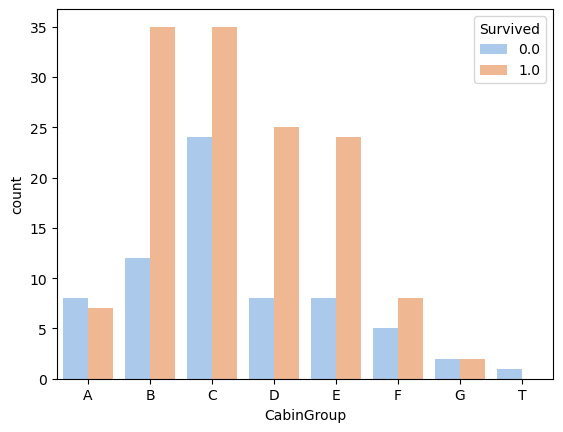

In [38]:
sns.countplot(x='CabinGroup', hue='Survived', data=df_train, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], palette='pastel')
plt.legend(loc='upper right', title='Survived')

It appears that a large proportion of passengers in Cabin B, C, D, E, and F were rescued, compared to ones in other cabins.

### Check the correlation between variables and target (Survived)

In [39]:
# Check the correlation between variables
from scipy.stats import chi2_contingency
def check_corr(variable):
    # Cross tabulation between variable and Survived
    crosstab = pd.crosstab(index=df_train[variable], columns=df_train.Survived)
    # Perform chi-square test
    chi2 = chi2_contingency(crosstab)
    p_value = chi2[1]
    if p_value > 0.05:
        print('p_value = {} > 0.05: Accept H0 - {} and Survived are not correlated with each other.'.format(round(p_value,2), variable))
    else:
        print('p_value = {} < 0.05: Reject H0 - {} and Survived are correlated with each other.'.format(round(p_value,2), variable))

In [40]:
for col in ['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'SibSp', 'Parch']:
    check_corr(col)

p_value = 0.0 < 0.05: Reject H0 - Pclass and Survived are correlated with each other.
p_value = 0.0 < 0.05: Reject H0 - Sex and Survived are correlated with each other.
p_value = 0.0 < 0.05: Reject H0 - Embarked and Survived are correlated with each other.
p_value = 0.0 < 0.05: Reject H0 - AgeGroup and Survived are correlated with each other.
p_value = 0.0 < 0.05: Reject H0 - SibSp and Survived are correlated with each other.
p_value = 0.0 < 0.05: Reject H0 - Parch and Survived are correlated with each other.


# Modeling

In [41]:
df_train = df.iloc[:891,:].copy()
df_test = df.iloc[891:,:].copy()

In [42]:
# Extract features and target
X = df_train[['Pclass', 'Sex', 'AgeGroup', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()
y = df_train.Survived.copy()

In [43]:
test = df_test[['Pclass', 'Sex', 'AgeGroup', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
df_train.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [46]:
# Preprocessing
num_cols = ['Pclass', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Sex', 'AgeGroup', 'Embarked']

num_trans = Pipeline([('num_imputer', SimpleImputer(strategy='mean')), 
                      ('scaler', StandardScaler())])

cat_trans = Pipeline([('cat_imputer', SimpleImputer(strategy='most_frequent')), 
                      ('cat_encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer([('num', num_trans, num_cols), 
                                  ('cat', cat_trans, cat_cols)])

In [47]:
X_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(X_train))
X_test_preprocessed = pd.DataFrame(preprocessor.transform(X_test))
test_preprocessed = pd.DataFrame(preprocessor.transform(test))

### 1. Logistic Regression

In [48]:
params = {'C': np.logspace(-5, 8, 15)}

lr = GridSearchCV(LogisticRegression(max_iter=100), param_grid=params, cv=5)
lr.fit(X_train_preprocessed, y_train)

/Users/trangnguyen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/trangnguyen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [49]:
print("Training accuracy score: {:.2f}".format(lr.score(X_train_preprocessed, y_train)))
print("Test accuracy score: {:.2f}".format(lr.score(X_test_preprocessed, y_test)))

Training accuracy score: 0.81
Test accuracy score: 0.81


In [50]:
lr.best_params_

{'C': 31.622776601683793}

### 2. KNN Classification

In [51]:
params = {'n_neighbors': range(1,7),
          'p': range(1,4)}

knn = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5)
knn.fit(X_train_preprocessed, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 7), 'p': range(1, 4)})

In [52]:
print("Training accuracy score: {:.2f}".format(knn.score(X_train_preprocessed, y_train)))
print("Test accuracy score: {:.2f}".format(knn.score(X_test_preprocessed, y_test)))

Training accuracy score: 0.84
Test accuracy score: 0.81


In [53]:
knn.best_params_

{'n_neighbors': 5, 'p': 1}

### 3. SVM Classification

In [54]:
params = {'C': [0.1, 1.0, 2.0],
          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          'gamma': [0.005, 0.025, 0.05, 0.1]}

svm = GridSearchCV(SVC(), param_grid=params, cv=5)
svm.fit(X_train_preprocessed, y_train)                                                                                                       

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 2.0],
                         'gamma': [0.005, 0.025, 0.05, 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [55]:
print("Training accuracy score: {:.2f}".format(svm.score(X_train_preprocessed, y_train)))
print("Test accuracy score: {:.2f}".format(svm.score(X_test_preprocessed, y_test)))

Training accuracy score: 0.84
Test accuracy score: 0.81


In [56]:
svm.best_params_

{'C': 2.0, 'gamma': 0.1, 'kernel': 'rbf'}

### 4. Decision Tree Classification

In [57]:
params = {'max_depth': range(2, 10),
          'min_samples_split': range(2, 10),
          'min_samples_leaf': range(1, 10),
          'max_features': [None, 'sqrt', 'log2'],
          'class_weight': ['balanced', {3:2}, {5:3}]}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5)
tree.fit(X_train_preprocessed, y_train)

/Users/trangnguyen/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
17280 fits failed out of a total of 25920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17280 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/trangnguyen/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/trangnguyen/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/Users/trangnguyen/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 241, in fit
    expanded_class_weight = comput

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', {3: 2}, {5: 3}],
                         'max_depth': range(2, 10),
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [58]:
print("Training accuracy score: {:.2f}".format(tree.score(X_train_preprocessed, y_train)))
print("Test accuracy score: {:.2f}".format(tree.score(X_test_preprocessed, y_test)))

Training accuracy score: 0.83
Test accuracy score: 0.81


In [59]:
tree.best_params_

{'class_weight': 'balanced',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

### 5. Random Forest Classification

In [60]:
params = {'n_estimators': [10, 20, 50, 100, 150, 200],
         'max_depth': range(1, 15),
         'min_samples_leaf': range(1, 10),
         'bootstrap': [True, False],
         'criterion': ['gini', 'entropy', 'log_loss']}

rf = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
rf.fit(X_train_preprocessed, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(1, 10),
                         'n_estimators': [10, 20, 50, 100, 150, 200]})

In [61]:
print("Training accuracy score: {:.2f}".format(rf.score(X_train_preprocessed, y_train)))
print("Test accuracy score: {:.2f}".format(rf.score(X_test_preprocessed, y_test)))

Training accuracy score: 0.83
Test accuracy score: 0.82


In [62]:
rf.best_params_

{'bootstrap': False,
 'criterion': 'log_loss',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'n_estimators': 100}

### 6. Gradient Boosting Classification

In [63]:
params = {'n_estimators': [50, 100, 150, 200],
          'learning_rate': [0.005, 0.01, 0.05],
          'max_depth': range(1, 7),
          'min_samples_split': range(2, 7),
          'min_samples_leaf': range(1, 7)}

gb = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=5)
gb.fit(X_train_preprocessed, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.005, 0.01, 0.05],
                         'max_depth': range(1, 7),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 7),
                         'n_estimators': [50, 100, 150, 200]})

In [64]:
print("Training accuracy score: {:.2f}".format(gb.score(X_train_preprocessed, y_train)))
print("Test accuracy score: {:.2f}".format(gb.score(X_test_preprocessed, y_test)))

Training accuracy score: 0.90
Test accuracy score: 0.84


In [65]:
gb.best_params_

{'learning_rate': 0.05,
 'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

## Making predictions

Comparing the above models for accuracy scores, Gradient Boosting Classification did the best job. Thus, it is used to make the final predictions.

In [66]:
df_test.Survived = gb.predict(test_preprocessed)

In [67]:
df_test.Survived = df_test.Survived.astype(int)